### Regression Tree

In [53]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [54]:
import pandas as pd

df = pd.read_csv('PCA_final.csv')
display(df.head())

,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,...,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,PC1,PC2,PC3
0,2021-01,Alabama,112124.0,1.371155,1.584112,0.032568,0.0,-0.231951,-0.237370,-0.199080,...,-1.154831,-1.239613,-1.010675,-0.710112,-0.403022,1.149867,-0.215768,-2.396417,-0.262114,-0.155315
1,2021-01,Alaska,8604.0,-0.537244,-0.539897,1.080654,1.0,-0.755107,-0.762349,-0.849780,...,-1.258975,-1.399782,-0.904952,-1.316842,-0.913240,1.939921,-0.215768,-3.198032,0.417148,0.067946
2,2021-01,Arizona,262750.0,2.366892,2.944381,1.492130,1.0,0.135100,0.059541,0.166176,...,-1.630906,-1.785018,-1.153541,-0.303895,-1.669627,2.105210,-0.215768,-3.498723,0.562954,-1.172292
3,2021-01,Arkansas,80418.0,0.281742,0.466371,0.247917,0.0,-0.458891,-0.484278,-0.474223,...,-1.131391,-1.283933,-0.874682,-0.393830,-0.124464,1.092664,-0.215768,-2.131540,-0.503742,-0.223589
4,2021-01,California,1180351.0,10.206922,11.821532,1.098149,1.0,4.449814,4.491572,4.087480,...,-2.567884,-2.012602,-1.050743,-1.861609,-2.430059,2.871310,-0.215768,-5.161720,1.488413,-0.310348


In [55]:
X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death', 
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population']]
y = df['inc_case']

#### **METHOD 1: Random Forest**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of Monte Carlo iterations
n_iterations = 100

# Initialize lists to store MSE values
mse_values = []

# Initialize lists to store predictions
y_pred_values = []

# Perform Monte Carlo cross-validation
for i in range(n_iterations):
    # Randomly split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Define and fit the RandomForestRegressor model
    regression_tree = RandomForestRegressor()
    regression_tree.fit(X_train, y_train)
    
    # Make predictions
    y_pred = regression_tree.predict(X_test)
    
    # Save predictions
    y_pred_values.append(y_pred)
    
    # Evaluate the model using MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

#### METHOD 1.2: Evaluation Metrics

In [57]:
# Calculate the average MSE across all iterations
average_mse = np.mean(mse_values)
print(f'Average Mean Squared Error: {average_mse}')

# Calculate RMSE
rmse = np.sqrt(average_mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate coverage
y_pred_concatenated = np.concatenate(y_pred_values)
coverage = np.mean((y_test >= np.min(y_pred_concatenated)) & (y_test <= np.max(y_pred_concatenated))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(np.concatenate(y_pred_values) - np.repeat(y_test, n_iterations))
print(f'Bias: {bias:.2f}')

Average Mean Squared Error: 9551353769.838879
Root Mean Squared Error: 97731.02767206983
Coverage: 98.82%
Bias: -3863.73


#### METHOD 1.3: Feature Importance

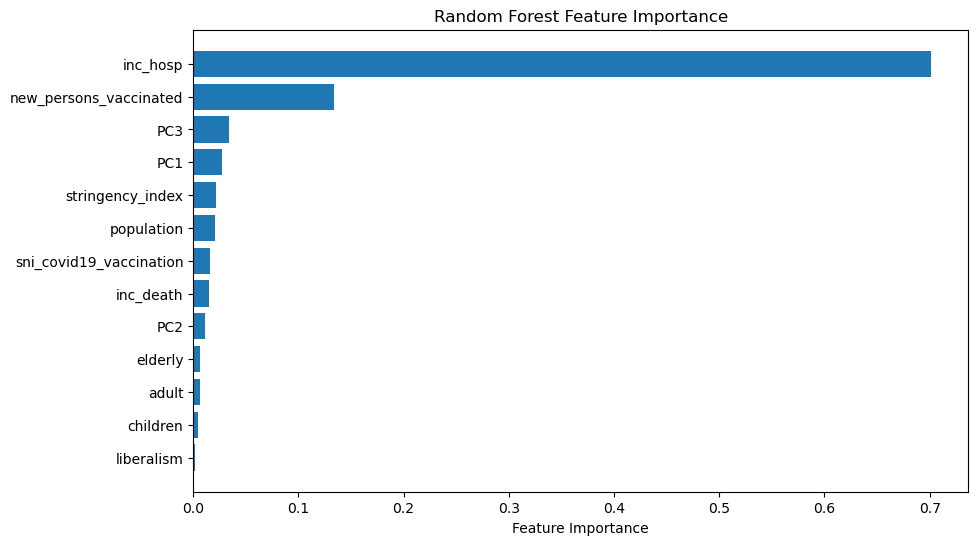

In [58]:
# Get feature importances from the random forest model
feature_importances = regression_tree.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### METHOD 1.4: Predictions vs. Actual Values

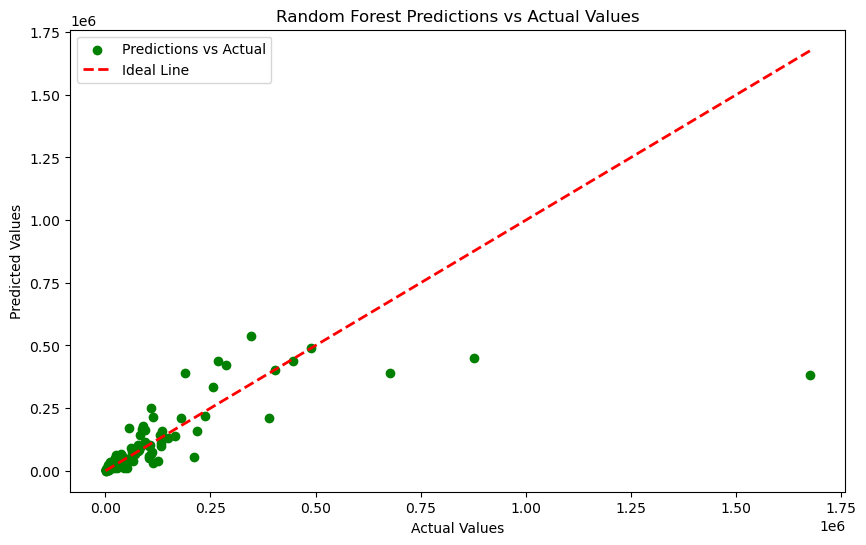

In [59]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### METHOD 1.5: Histogram of Residuals

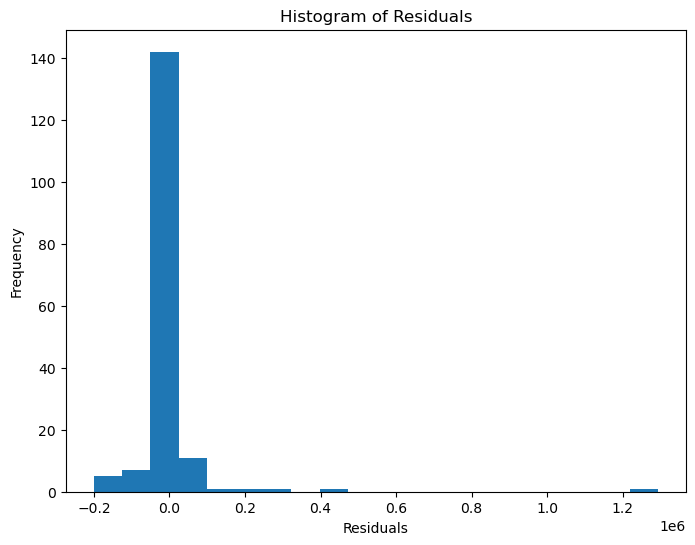

In [60]:
#Calculate Residuals
residuals = y_test - y_pred

#Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### **METHOD 2: Bagging**

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of Monte Carlo iterations
n_iterations = 100

# Initialize lists to store MSE values
mse_values_bagging = []

# Initialize lists to store predictions
y_pred_values_bagging = []

# Perform Bagging with Monte Carlo cross-validation
for i in range(n_iterations):
    # Defining and fitting the model
    # 50 base estimators (linear regression models) are trained with different subsets of the training data
    bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=i)
    bagging_model.fit(X_train, y_train)

    # Make predictions
    y_pred_bagging = bagging_model.predict(X_test)
    
    # Save predictions
    y_pred_values_bagging.append(y_pred_bagging)

    # Evaluate the model using MSE
    mse_bagging = mean_squared_error(y_test, y_pred_bagging)
    mse_values_bagging.append(mse_bagging)

/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed 

#### METHOD 2.1: Evaluation Metrics

In [62]:
# Calculate the average MSE across all iterations
average_mse_bagging = np.mean(mse_values_bagging)
print(f'Average Mean Squared Error (Bagging): {average_mse_bagging}')

# Calculate RMSE
rmse_bagging = np.sqrt(average_mse_bagging)
print(f'Root Mean Squared Error (Bagging): {rmse_bagging}')

# Calculate coverage
y_pred_concatenated_bagging = np.concatenate(y_pred_values_bagging)
coverage_bagging = np.mean((y_test >= np.min(y_pred_concatenated_bagging)) & (y_test <= np.max(y_pred_concatenated_bagging))) * 100
print(f'Coverage (Bagging): {coverage_bagging:.2f}%')

# Calculate bias
bias_bagging = np.mean(np.concatenate(y_pred_values_bagging) - np.repeat(y_test, n_iterations))
print(f'Bias (Bagging): {bias_bagging:.2f}')

Average Mean Squared Error (Bagging): 10288343152.983015
Root Mean Squared Error (Bagging): 101431.47022982076
Coverage (Bagging): 99.41%
Bias (Bagging): 1711.52


#### METHOD 2.2: Predictions vs. Actual Values

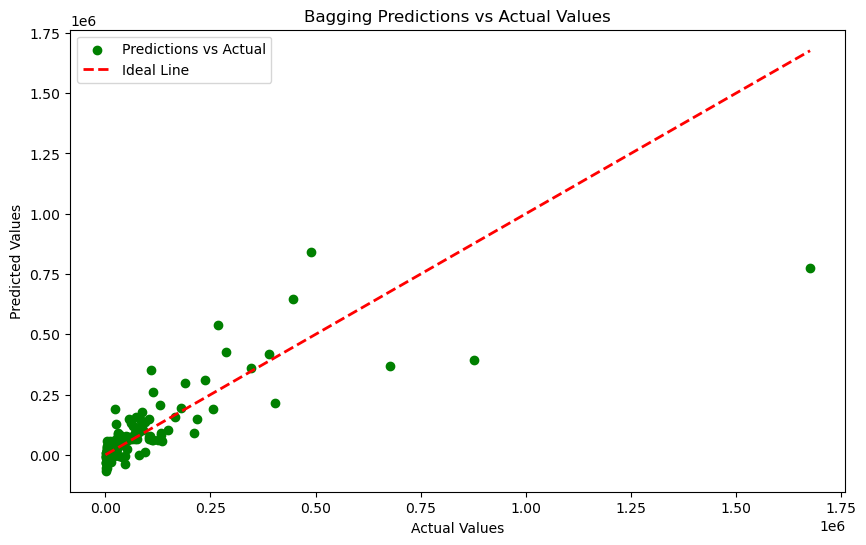

In [63]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Bagging Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### **METHOD 3: AdaBoost Regressor**

In [64]:
from sklearn.ensemble import AdaBoostRegressor

# Define the number of Monte Carlo iterations
n_iterations = 100

# Initialize lists to store MSE values
mse_values_adaboost = []

# Initialize lists to store predictions
y_pred_values_adaboost = []

# Perform AdaBoost with Monte Carlo cross-validation
for i in range(n_iterations):
    # Defining and fitting the model
    adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=i)
    adaboost_model.fit(X_train, y_train)

    # Make predictions
    y_pred_adaboost = adaboost_model.predict(X_test)
    
    # Save predictions
    y_pred_values_adaboost.append(y_pred_adaboost)

    # Evaluate the model using MSE
    mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
    mse_values_adaboost.append(mse_adaboost)

/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed 

#### 3.1: Evaluation Metrics

In [65]:
# Calculate the average MSE across all iterations
average_mse_adaboost = np.mean(mse_values_adaboost)
print(f'Average Mean Squared Error (AdaBoost): {average_mse_adaboost}')

# Calculate RMSE
rmse_adaboost = np.sqrt(average_mse_adaboost)
print(f'Root Mean Squared Error (AdaBoost): {rmse_adaboost}')

# Calculate coverage
y_pred_concatenated_adaboost = np.concatenate(y_pred_values_adaboost)
coverage_adaboost = np.mean((y_test >= np.min(y_pred_concatenated_adaboost)) & (y_test <= np.max(y_pred_concatenated_adaboost))) * 100
print(f'Coverage (AdaBoost): {coverage_adaboost:.2f}%')

# Calculate bias
bias_adaboost = np.mean(np.concatenate(y_pred_values_adaboost) - np.repeat(y_test, n_iterations))
print(f'Bias (AdaBoost): {bias_adaboost:.2f}')

Average Mean Squared Error (AdaBoost): 14520329131.76069
Root Mean Squared Error (AdaBoost): 120500.32834710738
Coverage (AdaBoost): 54.71%
Bias (AdaBoost): 17580.89


#### 3.2: Predictions vs. Actual Values

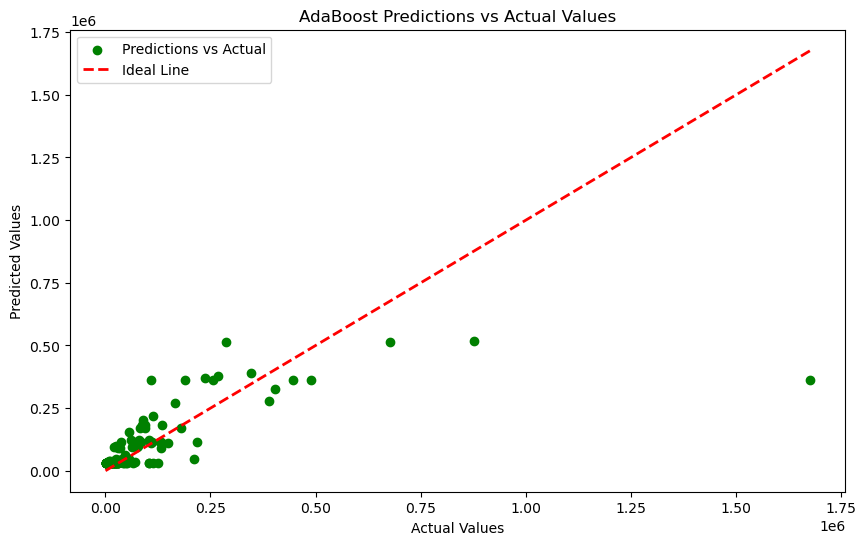

In [66]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('AdaBoost Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### **METHOD 4: XGBoost Regressor**

In [67]:
import xgboost as xgb

# Define the number of Monte Carlo iterations
n_iterations = 100

# Initialize lists to store MSE values
mse_values_xgboost = []

# Initialize lists to store predictions
y_pred_values_xgboost = []

# Perform XGBoost with Monte Carlo cross-validation
for i in range(n_iterations):
    # Define and fit the XGBoost model
    xgboost_model = xgb.XGBRegressor(random_state=i)
    xgboost_model.fit(X_train, y_train)

    # Make predictions
    y_pred_xgboost = xgboost_model.predict(X_test)
    
    # Save predictions
    y_pred_values_xgboost.append(y_pred_xgboost)

    # Evaluate the model using MSE
    mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
    mse_values_xgboost.append(mse_xgboost)


#### METHOD 4.1: Evaluation Metrics

In [68]:
# Calculate the average MSE across all iterations
average_mse_xgboost = np.mean(mse_values_xgboost)
print(f'Average Mean Squared Error (XGBoost): {average_mse_xgboost}')

# Calculate RMSE
rmse_xgboost = np.sqrt(average_mse_xgboost)
print(f'Root Mean Squared Error (XGBoost): {rmse_xgboost}')

# Calculate coverage
y_pred_concatenated_xgboost = np.concatenate(y_pred_values_xgboost)
coverage_xgboost = np.mean((y_test >= np.min(y_pred_concatenated_xgboost)) & (y_test <= np.max(y_pred_concatenated_xgboost))) * 100
print(f'Coverage (XGBoost): {coverage_xgboost:.2f}%')

# Calculate bias
bias_xgboost = np.mean(np.concatenate(y_pred_values_xgboost) - np.repeat(y_test, n_iterations))
print(f'Bias (XGBoost): {bias_xgboost:.2f}')


Average Mean Squared Error (XGBoost): 13649928306.441265
Root Mean Squared Error (XGBoost): 116832.90763496929
Coverage (XGBoost): 98.24%
Bias (XGBoost): -13061.06


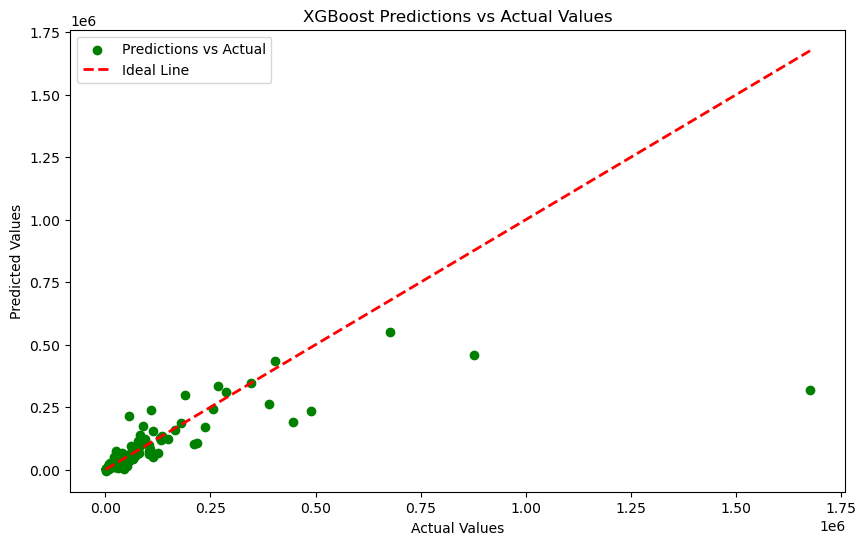

In [69]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgboost, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')

plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()